In [2]:
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Mount dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Data Preprocessing


# Model

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/vietnamdataset/Dataset',  # Replace with your path to the training directory
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True  # Shuffle the training data
)

validation_generator = val_datagen.flow_from_directory(
    '/content/drive/My Drive/vietnamdataset/Dataset',  # Replace with your path to the validation directory
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Do not shuffle the validation data
)


Found 974 images belonging to 10 classes.
Found 974 images belonging to 10 classes.


# Training

In [5]:
model = Sequential([
    Conv2D(32, (11, 11), activation='relu', input_shape=(224, 224, 3)),
    Conv2D(32, (4, 4), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (4, 4), activation='relu'),
    Conv2D(64, (4, 4), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (4, 4), activation='relu'),
    Conv2D(128, (4, 4), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'] )

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model8_custom_cnn.keras', monitor='val_loss', save_best_only=True, save_weights_only=False)

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint]
)

model.save('mon_modele_custom_cnn8.keras')

Epoch 1/30
31/31 [==============================] - 340s 11s/step - loss: 2.3065 - accuracy: 0.1345 - val_loss: 2.2491 - val_accuracy: 0.1930
Epoch 2/30
31/31 [==============================] - 27s 877ms/step - loss: 2.1879 - accuracy: 0.1910 - val_loss: 2.2428 - val_accuracy: 0.1961
Epoch 3/30
31/31 [==============================] - 25s 800ms/step - loss: 2.0721 - accuracy: 0.2526 - val_loss: 1.9397 - val_accuracy: 0.2967
Epoch 4/30
31/31 [==============================] - 30s 967ms/step - loss: 1.9235 - accuracy: 0.2957 - val_loss: 1.7670 - val_accuracy: 0.3645
Epoch 5/30
31/31 [==============================] - 25s 811ms/step - loss: 1.7911 - accuracy: 0.3706 - val_loss: 1.6222 - val_accuracy: 0.4251
Epoch 6/30
31/31 [==============================] - 27s 874ms/step - loss: 1.7080 - accuracy: 0.3891 - val_loss: 1.6130 - val_accuracy: 0.4014
Epoch 7/30
31/31 [==============================] - 25s 805ms/step - loss: 1.6003 - accuracy: 0.4209 - val_loss: 1.4003 - val_accuracy: 0.5185


# Evaluate

31/31 [==============================] - 7s 195ms/step
Matrice de confusion :
[[ 71   0   0   0   0   0   0   0   0   0]
 [  0 100   0   0   0   0   0   0   0   0]
 [  0   2  96   0   0   0   1   1   0   0]
 [  1   1   0 101   0   0   0   0   0   0]
 [  0   0   0   0 100   0   0   0   0   0]
 [  0   1   1   1   0  95   2   0   0   0]
 [  0   0   0   0   0   0 100   0   0   0]
 [  0   1   0   0   0   2   0  96   0   1]
 [  0   0   0   0   0   0   0   0 100   0]
 [  0   0   0   0   0   0   0   0   0 100]]
Rapport de classification :
                  precision    recall  f1-score   support

 10CelestialLady       0.99      1.00      0.99        71
       1AsiaPark       0.95      1.00      0.98       100
   2DragonBridge       0.99      0.96      0.97       100
   3GoldenBridge       0.99      0.98      0.99       103
          4MySon       1.00      1.00      1.00       100
5TranThiLyBridge       0.98      0.95      0.96       100
  6SapaRiceField       0.97      1.00      0.99       10

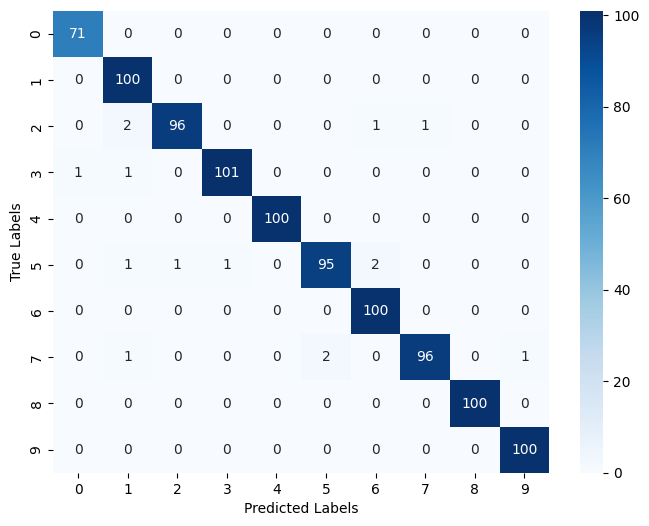

In [6]:
validation_generator.reset()
Y_pred = model.predict(validation_generator, steps=len(validation_generator))
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes

conf_matrix = confusion_matrix(y_true, y_pred)
print("Matrice de confusion :")
print(conf_matrix)

print("Rapport de classification :")
print(classification_report(y_true, y_pred, target_names=train_generator.class_indices.keys()))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


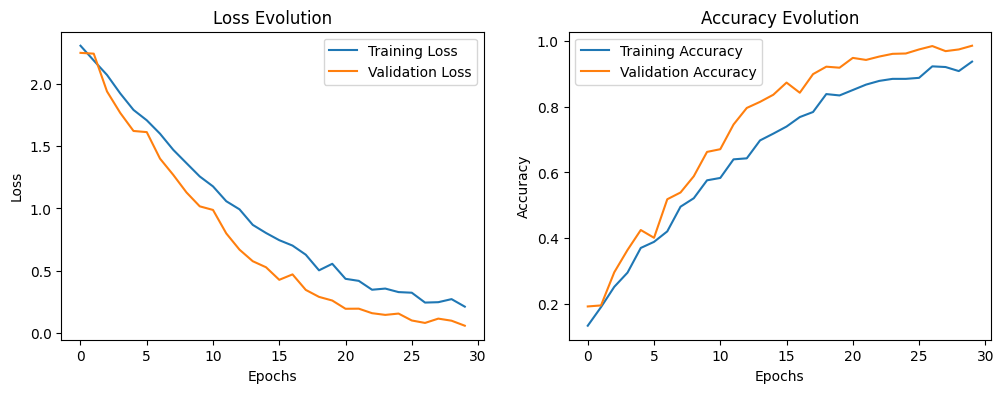

In [7]:
# Plot the training history
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Evolution')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Evolution')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Layer conv2d has filters with shape: (11, 11, 3, 32)


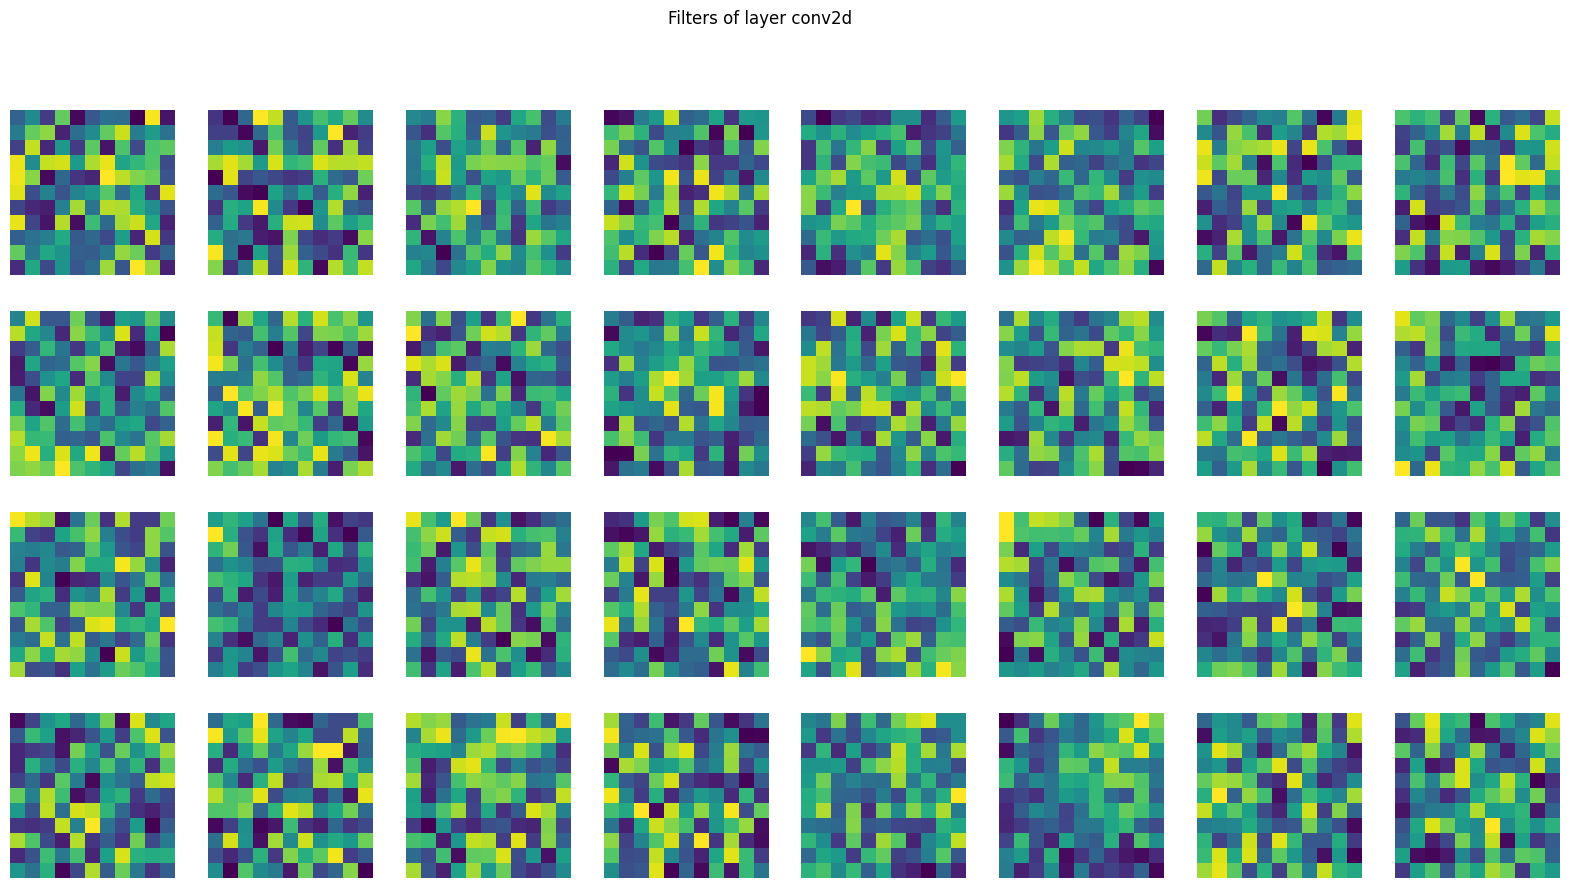

Layer conv2d_1 has filters with shape: (4, 4, 32, 32)


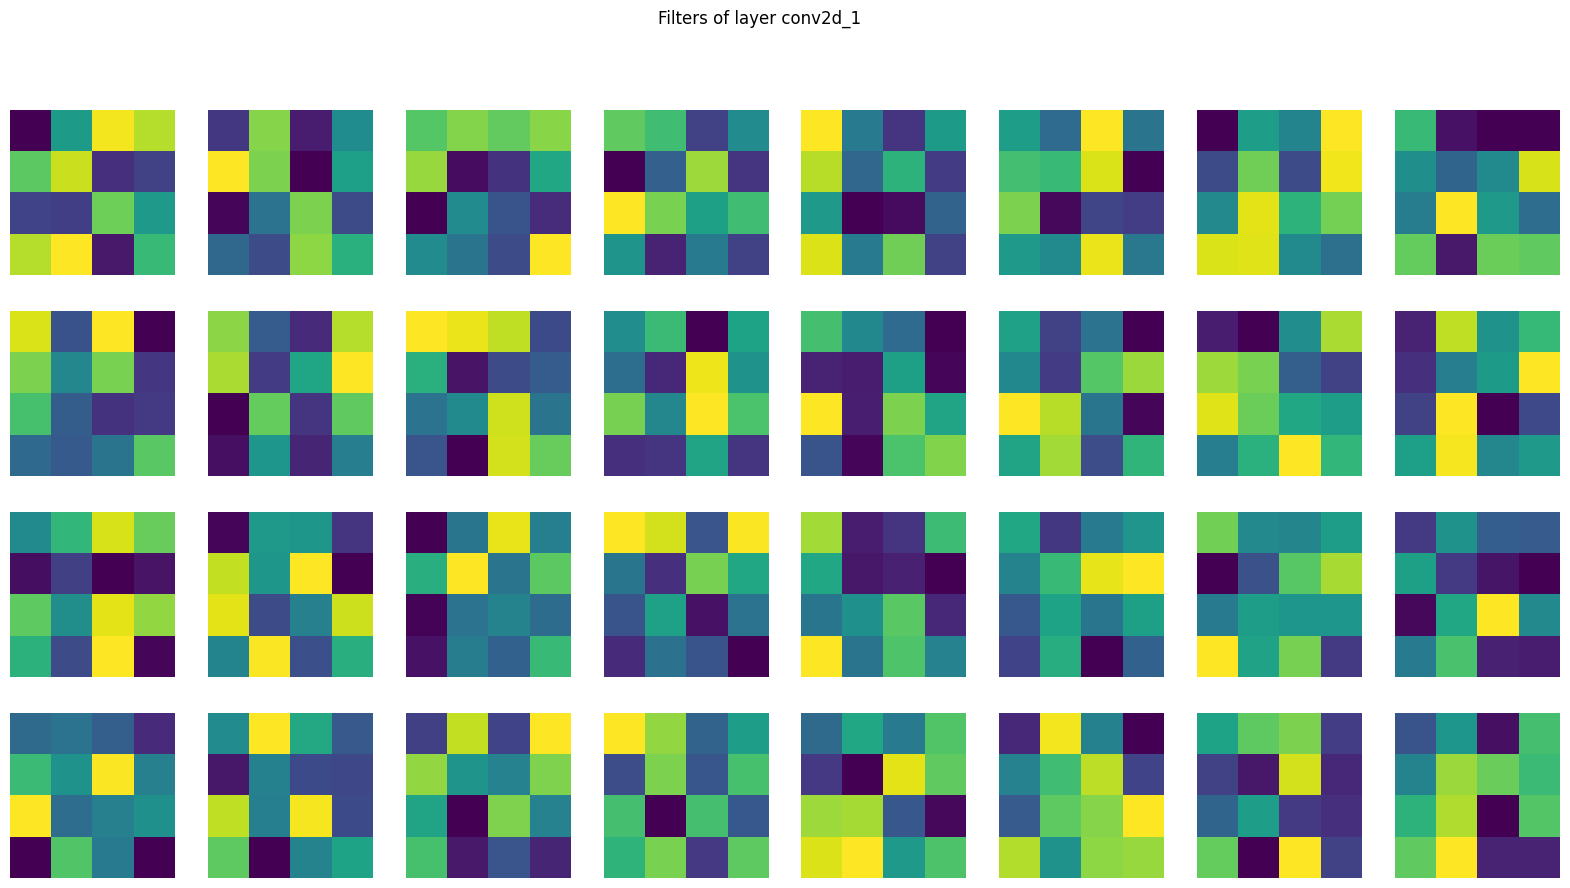

Layer conv2d_2 has filters with shape: (4, 4, 32, 64)


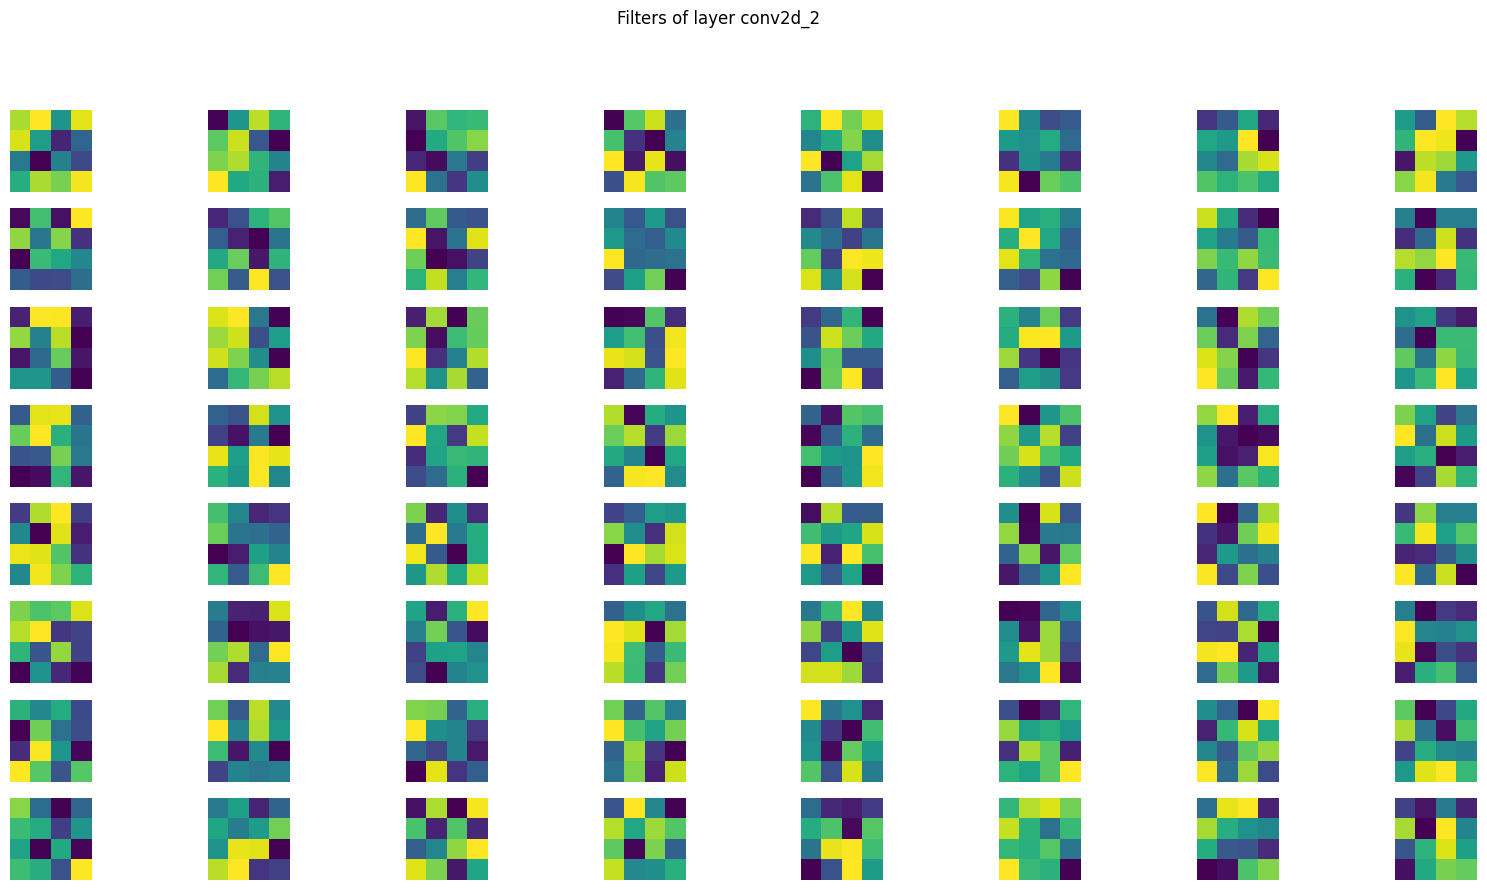

Layer conv2d_3 has filters with shape: (4, 4, 64, 64)


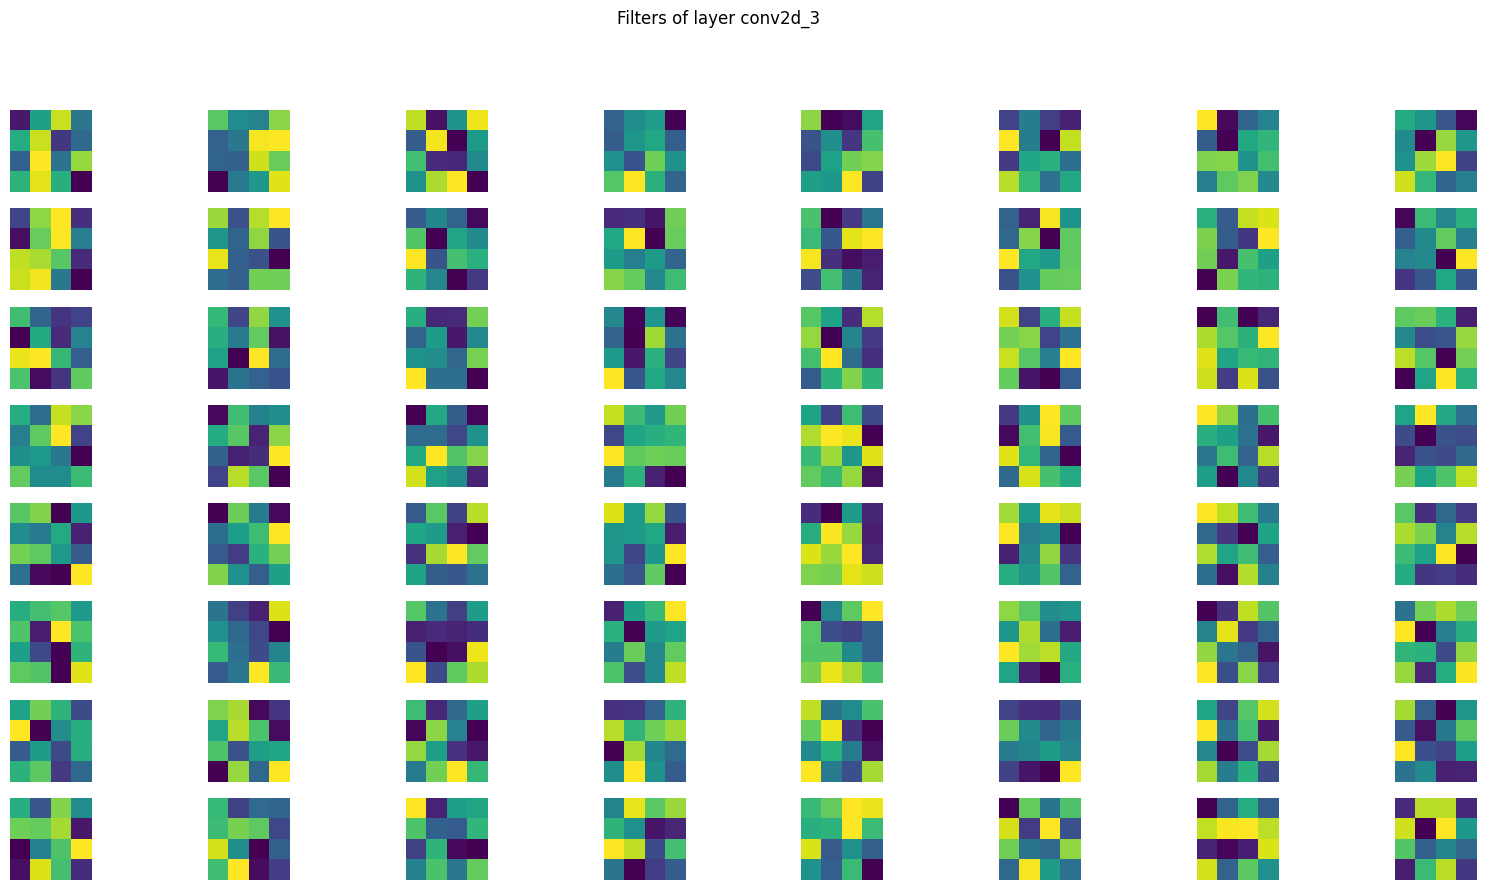

Layer conv2d_4 has filters with shape: (4, 4, 64, 128)


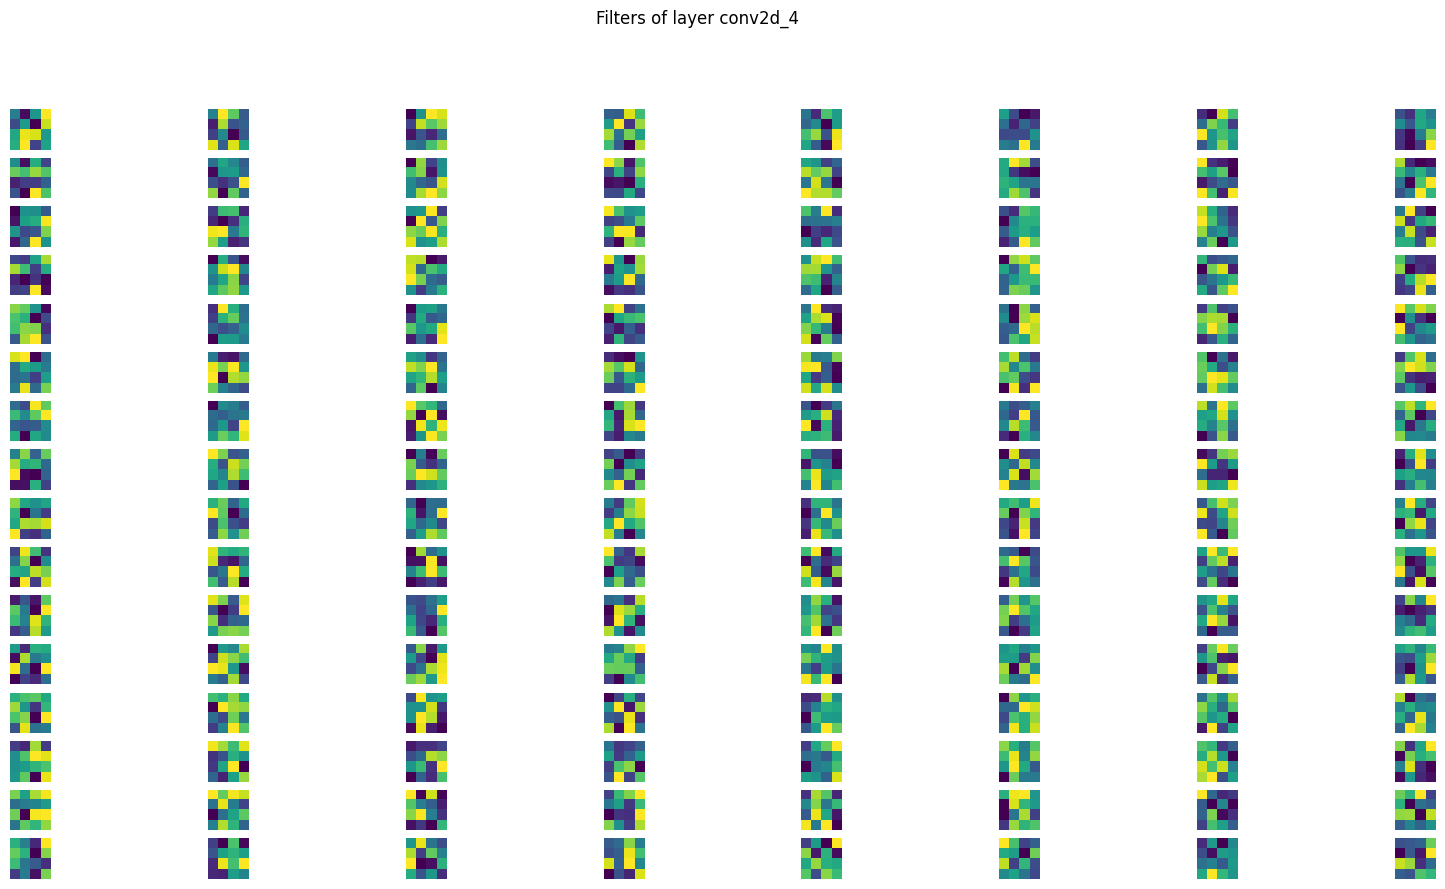

Layer conv2d_5 has filters with shape: (4, 4, 128, 128)


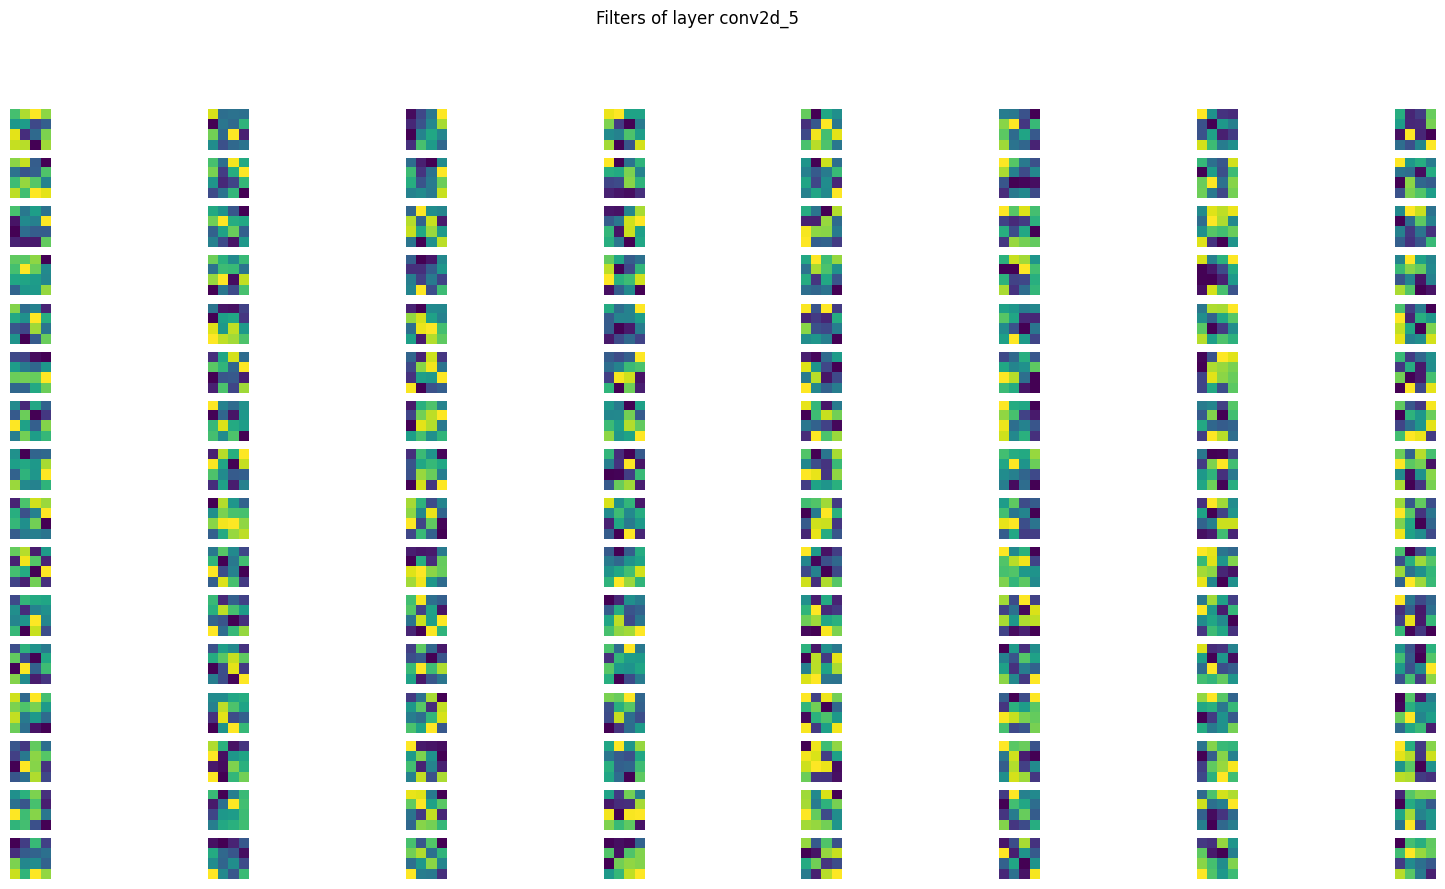

In [8]:
# Visualize the filters of all convolutional layers
for layer in model.layers:
    if 'conv' in layer.name:
        filters, biases = layer.get_weights()
        print(f"Layer {layer.name} has filters with shape: {filters.shape}")

        n_filters = filters.shape[-1]
        n_columns = 8
        n_rows = n_filters // n_columns

        plt.figure(figsize=(20, 10))
        for i in range(n_filters):
            f = filters[:, :, :, i]
            f_min, f_max = f.min(), f.max()
            f = (f - f_min) / (f_max - f_min)
            plt.subplot(n_rows, n_columns, i + 1)
            plt.imshow(f[:, :, 0], cmap='viridis')
            plt.axis('off')
        plt.suptitle(f'Filters of layer {layer.name}')
        plt.show()

In [ ]:
import os
import random
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

# Function to randomly select an image from a directory
def get_random_image_from_dir(base_dir):
    folders = [os.path.join(base_dir, d) for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
    random_folder = random.choice(folders)
    images = [os.path.join(random_folder, f) for f in os.listdir(random_folder) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
    random_image = random.choice(images)
    return random_image

# Function to visualize feature maps
def visualize_feature_maps(model, img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.0

    # Display the image
    plt.figure(figsize=(5, 5))
    plt.imshow(image.array_to_img(img_tensor[0]))
    plt.title("Randomly Selected Image")
    plt.axis('off')
    plt.show()

    layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name or 'pool' in layer.name]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(img_tensor)

    layer_names = [layer.name for layer in model.layers if 'conv' in layer.name or 'pool' in layer.name]

    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]

        n_columns = 8
        n_rows = n_features // n_columns

        plt.figure(figsize=(20, n_rows * 2))
        for i in range(n_features):
            plt.subplot(n_rows, n_columns, i + 1)
            plt.imshow(layer_activation[0, :, :, i], aspect='auto', cmap='viridis')
            plt.axis('off')
        plt.suptitle(f'Feature maps of layer {layer_name}')
        plt.show()

# Provide the base directory where the images are stored
base_dir = '/content/drive/My Drive/vietnamdataset/Dataset'  # Change this to your base directory
img_path = get_random_image_from_dir(base_dir)
print(f"Randomly selected image path: {img_path}")
visualize_feature_maps(model, img_path)